/home/main/Documents/Github/Yanacocha-IT/misc.py:88: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv(files[0], index_col=0)


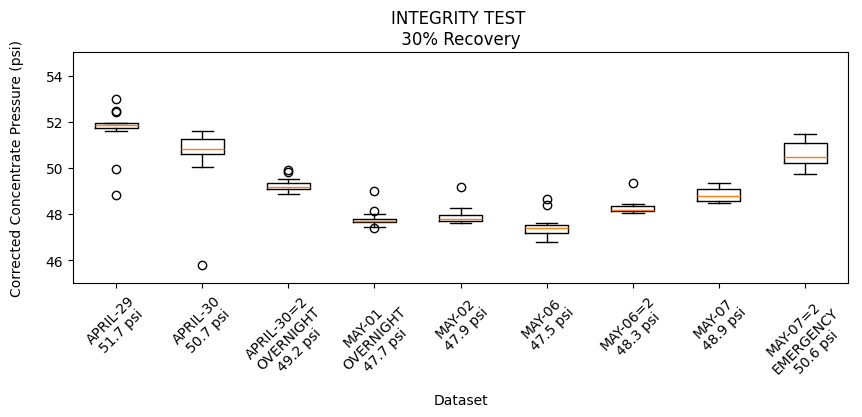

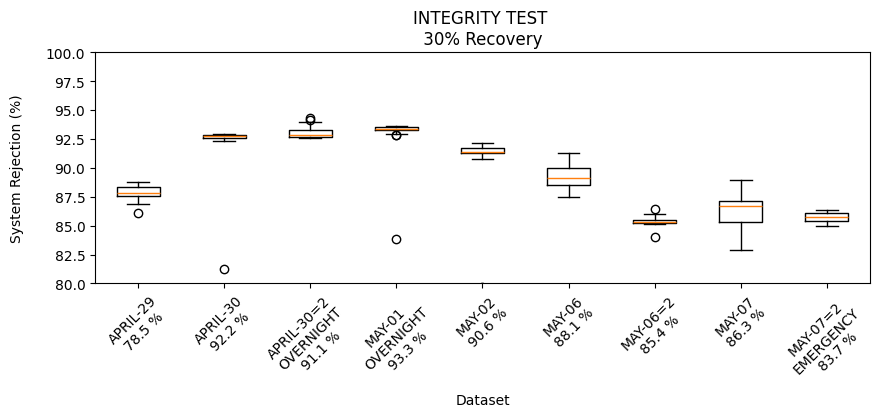

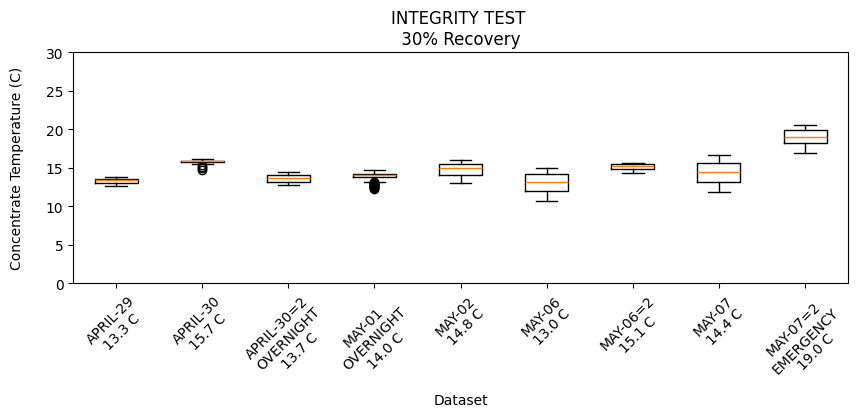

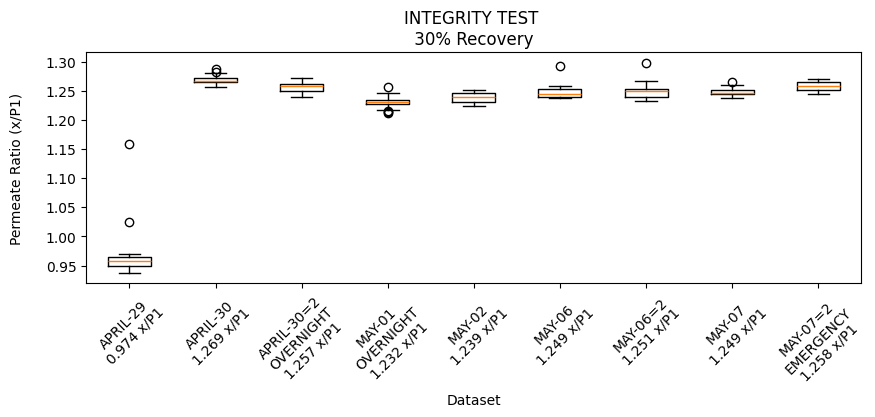

In [2]:
import matplotlib.pyplot as pyplot
import integrity, misc


# Specify the input channel for analysis
channels = ['Corrected Concentrate Pressure (psi)', 'System Rejection (%)','Concentrate Temperature (C)','Permeate Ratio (x/P1)']
limits = {'Corrected Concentrate Pressure (psi)':(45,55), 'System Rejection (%)':(80,100),'Concentrate Temperature (C)':(0,30)}
resolution={'Permeate Ratio (x/P1)':3}
recovery = 30

experiment_summaries, experiment_names, datasets = integrity.calculate_statistics(channels,site='DATA',recovery=recovery)

for channel in channels:

    summaries = list()
    for experiment_summary in experiment_summaries:
        summaries.append(experiment_summary[channel])

    fig, ax = pyplot.subplots(figsize=(10, 3))

    names = misc.format_names(experiment_names)
    tick_labels = list()
    for i, summary in enumerate(summaries):
        tick_labels.append(f"{names[i]}\n{round(summary.mean(),1 if channel not in resolution else resolution[channel])} {misc.extract_units(channel)}")

    ax.boxplot(summaries, tick_labels=tick_labels)

    ax.set_title(f"INTEGRITY TEST \n {recovery}% Recovery ")
    ax.set_xlabel('Dataset')
    ax.set_ylabel(f'{channel}\n')


    if channel in limits:
        pyplot.ylim(limits[channel])
    pyplot.xticks(rotation=45)
    pyplot.show()